In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Belajar DS/Rakamin JAP/Mini Project 2/hotel_bookings_data.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Task 1

## Missing Value

In [37]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

Ditemukan terdapat 4 kolom yang memiliki missing value yaitu:
1. Company
2. Agent
3. City
4. Children

Treatment method untuk masing masing kolom yang memiliki missing value (Null) yakni:
1. Kolom atau Feature Company dapat di-drop karena terlalu banyak missing value yaitu mencapai  112593
2. Kolom atau Feature Agent juga dapat di-drop dengan alasan yang sama dengan Feature Company
3. Kolom atau Feature City dapat diisi dengan nilai terbanyak yang mucul pada kolom tersebut (modus) karena missing value tidak sebanyak Company dan Agent
4. Kolom atau Feature Children dapat dihapus missing valuenya saja karena hanya 4 baris

In [38]:
#Treatment no 1&2
df.drop(columns=['company','agent'], inplace = True)

In [39]:
#Treatment no 3
mode_city=df['city'].mode()[0]
df['city'].fillna(mode_city, inplace= True)

In [40]:
#Treatment no 4
df.dropna(subset=['children'], inplace=True)

In [41]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
market_segment                    0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
city                              0
is_canceled                       0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_weekdays_nights          0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year                 0
lead_time                         0
reservation_status                0
dtype: int64

## Meal Value not Matching

In [42]:
df['meal'].value_counts()

Breakfast     92306
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Disini saya mengasumsikan bahwa nilai undefined pada kolom meal berarti tidak ada kejelasan tipe meal yang akan diberikan pada pelanggan sehingga akan lebih baik apabila nilai tersebut di-assign sama dengan no meal

In [43]:
df['meal']=df['meal'].str.replace('Undefined', 'No Meal')

In [44]:
df['meal'].value_counts()

Breakfast     92306
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

## Guest Value not Required

Mengecek keseluruhan data dan ternyata terdapat duplikat

Asumsi saya bahwa setiap pesanan hotel setidaknya ada 1 tamu orang dewasa yang melakukan pemesanan tersebut, pada data masih terdapat pesanan hotel yang tamunya hanya anak anak dan bayi maka dari itu perlu dihapus.

In [45]:
df.drop(df[df['adults'] <= 0].index, inplace = True)

In [46]:
df['adults'].value_counts()

2     89677
1     23027
3      6201
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

# Task 2

## Total Order per Month(and Year) per Hotel Type

In [47]:
df_clean=df.copy()
order_per_month=df_clean.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
order_per_month.columns=['hotel_type', 'month', 'unique_year' ,'total_booking']
order_per_month

,hotel_type,month,unique_year,total_booking
0,City Hotel,April,2,4932
1,City Hotel,August,2,7873
2,City Hotel,December,2,7578
3,City Hotel,February,2,4091
4,City Hotel,January,2,4330
5,City Hotel,July,2,8205
6,City Hotel,June,2,7448
7,City Hotel,March,2,3712
8,City Hotel,May,2,6417
9,City Hotel,November,2,7381


## Data Normalization

Perlu dilakukan normalisasi data karena terdapat pesanan kamar hotel dengan bulan dan tahun yang berbeda. Hal ini dilakukan dengan cara mencari rata rata pesanan 

In [54]:
order_per_month['avg_booking']=round(order_per_month['total_booking']/order_per_month['unique_year'])
order_per_month

,hotel_type,month,unique_year,total_booking,avg_booking
0,City Hotel,April,2,4932,2466.0
1,City Hotel,August,2,7873,3936.0
2,City Hotel,December,2,7578,3789.0
3,City Hotel,February,2,4091,2046.0
4,City Hotel,January,2,4330,2165.0
5,City Hotel,July,2,8205,4102.0
6,City Hotel,June,2,7448,3724.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6417,3208.0
9,City Hotel,November,2,7381,3690.0


## Month Sorth Ascending

In [74]:
month_order_by = ['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
order_per_month['month'] = order_per_month['month']
order_per_month['month'] = pd.Categorical(order_per_month['month'], categories=month_order_by, ordered=True)
order_per_month

,hotel_type,month,unique_year,total_booking,avg_booking
0,City Hotel,April,2,4932,2466.0
1,City Hotel,August,2,7873,3936.0
2,City Hotel,December,2,7578,3789.0
3,City Hotel,February,2,4091,2046.0
4,City Hotel,January,2,4330,2165.0
5,City Hotel,July,2,8205,4102.0
6,City Hotel,June,2,7448,3724.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6417,3208.0
9,City Hotel,November,2,7381,3690.0


## Visualization & Interpretation 1

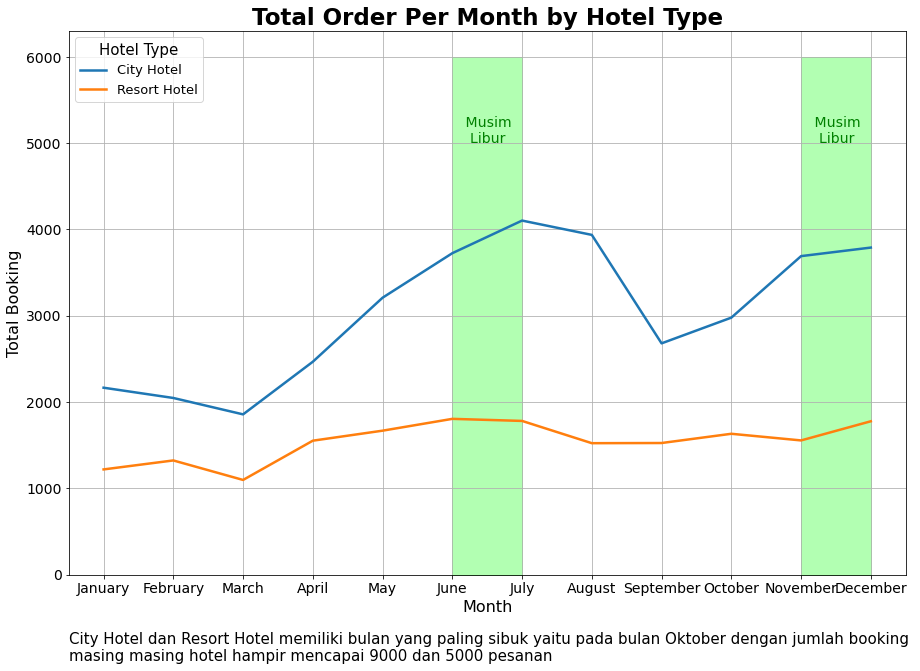

In [75]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = 'month', y='avg_booking', hue='hotel_type', data=order_per_month, size='hotel_type', sizes=(2.5, 2.5), hue_order = ['City Hotel', 'Resort Hotel'], ci='sd')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc='upper left')
plt.xlim(-0.5, 11.5)
plt.title('Total Order Per Month by Hotel Type', fontsize=23, fontweight='bold')
plt.text(x=-0.5, y=-1000, s='City Hotel dan Resort Hotel memiliki bulan yang paling sibuk yaitu pada bulan Oktober dengan jumlah booking \nmasing masing hotel hampir mencapai 9000 dan 5000 pesanan', fontsize=15)
plt.stackplot(np.arange(10,12,1),[[6000]], color='lime', alpha=0.3)
plt.text(x=10, y=5000, s='   Musim\n    Libur', fontsize=14, color='green')
plt.stackplot(np.arange(5,7,1),[[6000]], color='lime', alpha=0.3)
plt.text(x=5, y=5000, s='   Musim\n    Libur', fontsize=14, color='green')

plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Booking', fontsize=16)
plt.show()

Intepretasi:
1. Bulan paling sibuk baik pada hotel tipe City maupun Resort jatuh pada bulan Juli
2. Kedua hotel memiliki jumlah order terkecilnya pada bulan Maret
3. Peningkatan jumlah pesanan tertinggi pada City Hotel terjadi dari bulan Maret sampai Juli
4. Peningkatan jumlah pesanan tertinggi pada Resort Hotel terjadi dari bulan Maret sampai Juni
5. Pada musim libur anak sekolah, kedua tipe hotel mengalami peningkatan pemesanan kamar namun pada Resort hotel jumlah pesanan kamar cenderung stagnan atau tetap pada periode libur bulan Juni sampai Juli

# Task 3

## Total_stays

Hal yang dilakukan:
1. Membuat kolom total_stay dengan menggabungkan stay_in_weekends_nights dan stays_in_weekdays_night
2. Menggunakan data pesanan kamar yang total stay nya >0

In [76]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [77]:
df_clean3 = df[df['total_stay'] > 0].copy().reset_index()

In [78]:
df_clean3['total_stay']

0         1
1         1
2         2
3         2
4         2
         ..
118333    7
118334    7
118335    7
118336    7
118337    9
Name: total_stay, Length: 118338, dtype: int64

## kelompokkan nilai nilai

Hal yang dilakukan:
1. Melihat persebaran data
2. Mengelompokkan total_stay agar persebaran data lebih merata

<AxesSubplot:xlabel='total_stay', ylabel='Count'>

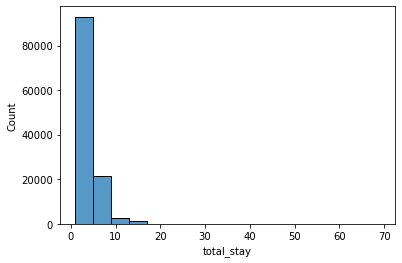

In [79]:
sns.histplot(data=df_clean3, x='total_stay', binwidth=4)

Mengelompokkan total_stay yang diatas 2 minggu menjadi 15 hari dan yang diatas 3 minggu menjadi bulat 21 hari

In [80]:
df_clean3['total_stays_group'] = np.where(df_clean3['total_stay'] > 14, 15,
                                    np.where(df_clean3['total_stay'] > 21, 21, df_clean3['total_stay']))
df_clean3['total_stays_group'].value_counts()

2     27600
3     27008
1     20973
4     17318
7      8638
5      7746
6      3835
8      1152
10     1135
14      913
9       840
15      429
11      392
12      220
13      139
Name: total_stays_group, dtype: int64

## Cancelled_order_by_total_stays

In [81]:
cancelled_order = df_clean3.groupby(['hotel','is_canceled','total_stays_group']).agg({'arrival_date_month' : 'count'}).reset_index()
cancelled_order

,hotel,is_canceled,total_stays_group,arrival_date_month
0,City Hotel,0,1,9132
1,City Hotel,0,2,10960
2,City Hotel,0,3,11853
3,City Hotel,0,4,7667
4,City Hotel,0,5,3192
5,City Hotel,0,6,1105
6,City Hotel,0,7,1242
7,City Hotel,0,8,204
8,City Hotel,0,9,119
9,City Hotel,0,10,80


In [84]:
df_clean3_recap= cancelled_order.pivot_table(index=['hotel', 'total_stays_group'],
                               columns=['is_canceled'],values=['arrival_date_month']).reset_index()
df_clean3_recap.columns = ['hotel','total_stays_group','not_canceled','canceled']
df_clean3_recap['cancellation_percentage'] = round(df_clean3_recap['canceled']*100.0/(df_clean3_recap['not_canceled']+df_clean3_recap['canceled']),2)
df_clean3_recap

,hotel,total_stays_group,not_canceled,canceled,cancellation_percentage
0,City Hotel,1,9132,4094,30.95
1,City Hotel,2,10960,10423,48.74
2,City Hotel,3,11853,9462,44.39
3,City Hotel,4,7667,4825,38.62
4,City Hotel,5,3192,1768,35.65
5,City Hotel,6,1105,933,45.78
6,City Hotel,7,1242,801,39.21
7,City Hotel,8,204,174,46.03
8,City Hotel,9,119,93,43.87
9,City Hotel,10,80,116,59.18


## Visualization & Interpretation 2

Text(0, 0.5, 'Cancellation Percentage')

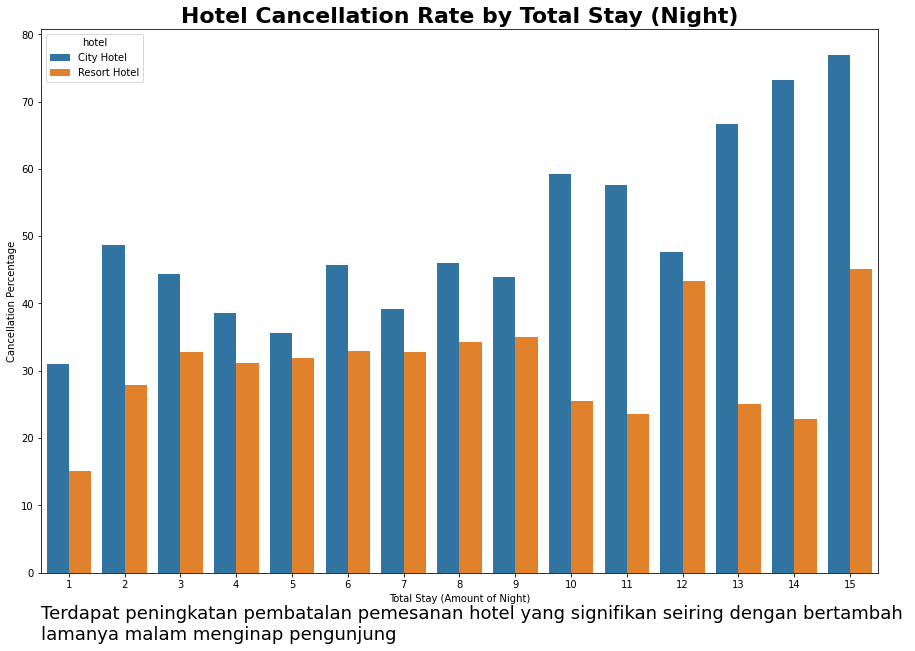

In [107]:
plt.figure(figsize=(15,10))
sns.barplot(x='total_stays_group', y='cancellation_percentage', hue='hotel', data=df_clean3_recap) 
plt.title('Hotel Cancellation Rate by Total Stay (Night)', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=-10, s='Terdapat peningkatan pembatalan pemesanan hotel yang signifikan seiring dengan bertambah \nlamanya malam menginap pengunjung',fontsize=18)
plt.xlabel('Total Stay (Amount of Night)')
plt.ylabel('Cancellation Percentage')

Intepretasi:
1. Kedua tipe hotel yaitu City dan Resort Hotel memiliki tingkat pembatalan pemesanan terendah ketika pengunjung hanya berencana menginap selama satu malam
2. Kedua tipe hotel yaitu City dan Resort Hotel memiliki tingkat pembatalan pemesanan tertinggi ketika pengunjung berencana menginap selama lebih dari dua minggu 

# Task 4

## Kategorisasi kolom lead time

In [3]:
df_clean4=df.copy()

In [4]:
def group(x):
    if x['lead_time'] <= 30:
        group = 30
    elif x['lead_time'] >= 31 and x['lead_time'] <= 120:
        group = 120
    elif x['lead_time'] >= 121 and x['lead_time'] <= 210:
        group = 210
    elif x['lead_time'] >= 211 and x['lead_time'] <= 300:
        group = 300
    elif x['lead_time'] >= 301 and x['lead_time'] <= 360:
        group = 360
    else:
        group = 361
    return group

df_clean4['lead_time_group'] = df_clean4.apply(lambda x: group(x), axis=1)
df_clean4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,360
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,361
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out,30
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out,30
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out,30


## Cancelled_order_by_lead_time_per_hotel_type

In [6]:
lead_time_cancel = df_clean4.groupby(['hotel', 'is_canceled', 'lead_time_group'])['hotel'].count().reset_index(name='total_bookings')
df_clean4_recap = lead_time_cancel.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='total_bookings').reset_index()
df_clean4_recap['cancellation_rate'] = round(df_clean4_recap[1]*100.0/(df_clean4_recap[0]+df_clean4_recap[1]), 2)
df_clean4_recap

is_canceled,hotel,lead_time_group,0,1,cancellation_rate
0,City Hotel,30,18163,5199,22.25
1,City Hotel,120,16458,11786,41.73
2,City Hotel,210,7317,7053,49.08
3,City Hotel,300,2767,4381,61.29
4,City Hotel,360,733,2608,78.06
5,City Hotel,361,790,2075,72.43
6,Resort Hotel,30,13358,1986,12.94
7,Resort Hotel,120,7743,4000,34.06
8,Resort Hotel,210,4609,2686,36.82
9,Resort Hotel,300,2274,1723,43.11


## Visualization & Interpretation 3

Text(0, 0.5, 'Cancellation Percentage')

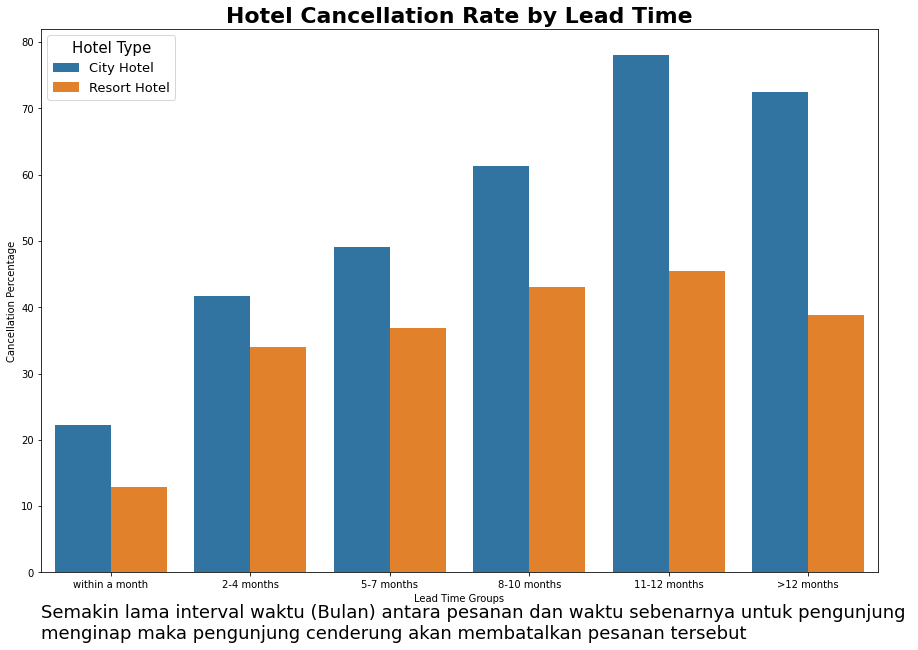

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='cancellation_rate', hue='hotel', data=df_clean4_recap) 
plt.title('Hotel Cancellation Rate by Lead Time', fontsize=22, fontweight='bold')
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc='upper left')
plt.text(x=-0.5, y=-10, s='Semakin lama interval waktu (Bulan) antara pesanan dan waktu sebenarnya untuk pengunjung \nmenginap maka pengunjung cenderung akan membatalkan pesanan tersebut',fontsize=18)
plt.xticks(range(0,6,1), labels=['within a month', '2-4 months', '5-7 months', '8-10 months', '11-12 months', '>12 months'])
plt.xlabel('Lead Time Groups')
plt.ylabel('Cancellation Percentage')

Intepretasi:
1. Dari visualisasi diatas dapat ditarik kesimpulan bahwa pengunjung cenderung akan membatalkan pesanan apabila waktu lead timenya tinggi. Hal ini kemungkinan terjadi karena pada saat lead time, pengunjung dapat lupa atau justru memilih opsi lain yaitu menginap di hotel yang lain.
2. Tingkat pembatalan kedua tipe hotel paling tinggi terjadi ketika lead time berada pada interval 11-12 bulan
3. Tingkat pembatalan kedua tipe hotel paling tinggi terjadi ketika lead time berada pada interval 11-12 bulan